In [6]:
from langgraph.graph import StateGraph ,START ,END
from typing import TypedDict

In [18]:
# define the state
class BMIState(TypedDict):
    weight_kg : float
    height_m  : float
    bmi : float
    category : str

In [8]:
def calculateBMI(state : BMIState) -> BMIState:
    weight = state['weight_kg'] 
    height = state['height_m']
    state['bmi'] = weight/(height**2)
    return state

In [19]:
def categoryFALL(state : BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif bmi >=18.5 and bmi < 25:
        state['category'] = 'Normal'
    elif bmi>=25 and bmi < 30:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'
    
    return state

In [20]:
#define your graph
graph = StateGraph(BMIState)

#add node to your graph
graph.add_node('calBMI', calculateBMI )
graph.add_node('predictcategory' , categoryFALL)

#add edges to your graph
graph.add_edge(START , 'calBMI')
graph.add_edge('calBMI' , 'predictcategory')
graph.add_edge('predictcategory' , END)

#compile graph
workflow = graph.compile() 


In [22]:
#execute the graph

inital_state = {'weight_kg' : 70 , 'height_m' : 1.75}
final_state = workflow.invoke(inital_state)
print(final_state)

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.857142857142858, 'category': 'Normal'}


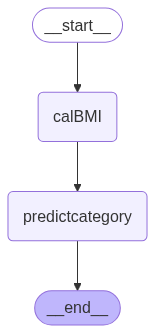

In [21]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())